In [1]:
import os
import pandas as pd
import numpy as np

## Descrição

 
Este case consiste em um exercício prático de construção de um modelo e quais insights você consegue extrair dos dados.

Desenhamos o case para que você possa mostrar as suas habilidades como cientista de dados.

O conjunto de dados que fornecemos contém observações diárias do clima de algumas estações meteorológicas na Austrália.
 
Os dados estão organizados em duas tabelas:

- `rain_data_aus.csv`: Contém a maior parte das informações, já centralizadas, de todas as estações.

- `wind_table_01.csv a wind_table_08.csv`: Contém informações sobre velocidade e orientação de ventos.


As tabelas estão apartadas, pois são originadas de um outro instrumento e salvas em um sistema apartado.

 

A descrição das colunas se encontra no arquivo `data_dictionary.md`.

Submeta os arquivos em um repositório no git e nos envie o link para avaliação.

Idealmente, queremos poder replicar sua análise a partir dos códigos enviados. Portanto, especifique as versões das ferramentas e pacotes que você está usando.


## Objetivo:

Construir um modelo preditivo para determinar se vai ou não chover amanhã. 

# Variáveis e decrições

Variable | Description
---------|------------
Date   |  The date of observation
Location   |  The common name of the location of the weather station
MinTemp   |  The minimum temperature in degrees celsius
MaxTemp   |  The maximum temperature in degrees celsius
Rainfall   |  The amount of rainfall recorded for the day in mm
Evaporation   |  The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine   |  The number of hours of bright sunshine in the day.
WindGustDir   |  The direction of the strongest wind gust in the 24 hours to midnight
WindGustSpeed   |  The speed (km/h) of the strongest wind gust in the 24 hours to midnight
WindDir9am   |  Direction of the wind at 9am
WindDir3pm   |  Direction of the wind at 3pm
WindSpeed9am   |  Wind speed (km/hr) averaged over 10 minutes prior to 9am
WindSpeed3pm   |  Wind speed (km/hr) averaged over 10 minutes prior to 3pm
Humidity9am   |  Humidity (percent) at 9am
Humidity3pm   |  Humidity (percent) at 3pm
Pressure9am   |  Atmospheric pressure (hpa) reduced to mean sea level at 9am
Pressure3pm   |  Atmospheric pressure (hpa) reduced to mean sea level at 3pm
Cloud9am   |  Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.
Cloud3pm | Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
Temp9am |  Temperature (degrees C) at 9am
Temp3pm |  Temperature (degrees C) at 3pm
Precipitation9am |  The amount of rain in mm prior to 9am
Precipitation3pm |  The amount of rain in mm prior to 3pm
AmountOfRain |  The amount of rain in mm
Temp |  Temperature (degrees C)
Humidity |  Humidity (percent)
RainToday |  Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
RainTomorrow |  The target variable. Did it rain tomorrow?


## Looking the rain dataset

In [2]:
pd.set_option('display.max_columns', 999)

In [3]:
data = pd.read_csv('./data/rain_data_aus.csv')
data

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,29.48,28.400000,12,5.115360,0.089825
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,32.12,2.208569,10,21.497100,0.023477
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,32.84,38.000000,17,20.782859,0.027580
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,35.60,21.200000,8,12.028646,0.023962
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,40.76,41.600000,9,11.883546,0.220164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No,28.16,34.400000,12,5.848681,0.002556
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No,30.08,30.800000,10,6.653879,0.002053
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No,32.36,27.200000,9,19.715976,0.023350
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No,34.28,30.800000,12,0.985551,0.007195


## Creating dataframe with all wind information

In [4]:
winds = os.listdir('./data')
winds.remove('rain_data_aus.csv')
winds

['wind_table_01.csv',
 'wind_table_05.csv',
 'wind_table_07.csv',
 'wind_table_06.csv',
 'wind_table_03.csv',
 'wind_table_02.csv',
 'wind_table_08.csv',
 'wind_table_04.csv']

In [5]:
winds_list = []
for i in winds:
    intermediate = pd.read_csv(f'./data/{i}') ## 2 dfs have different columns name
    intermediate.columns = ['date', 'location', 'wind_gustdir', 'wind_gustspeed', 'wind_dir9am',
       'wind_dir3pm', 'wind_speed9am', 'wind_speed3pm']
    winds_list.append(intermediate)
wind_df = pd.concat(winds_list, axis = 0)
wind_df

,date,location,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm
0,2007-11-01,Canberra,NW,30.0,SW,NW,6.0,20.0
1,2007-11-02,Canberra,ENE,39.0,E,W,4.0,17.0
2,2007-11-03,Canberra,NW,85.0,N,NNE,6.0,6.0
3,2007-11-04,Canberra,NW,54.0,WNW,W,30.0,24.0
4,2007-11-05,Canberra,SSE,50.0,SSE,ESE,20.0,28.0
...,...,...,...,...,...,...,...,...
19995,2013-11-29,Cobar,S,48.0,S,SSW,15.0,19.0
19996,2013-11-29,CoffsHarbour,S,50.0,NE,SSW,20.0,17.0
19997,2013-11-29,Moree,SW,48.0,W,NNW,15.0,19.0
19998,2013-11-29,Newcastle,NaN,NaN,NaN,SE,0.0,9.0


In [6]:
wind_df.drop_duplicates()

,date,location,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm
0,2007-11-01,Canberra,NW,30.0,SW,NW,6.0,20.0
1,2007-11-02,Canberra,ENE,39.0,E,W,4.0,17.0
2,2007-11-03,Canberra,NW,85.0,N,NNE,6.0,6.0
3,2007-11-04,Canberra,NW,54.0,WNW,W,30.0,24.0
4,2007-11-05,Canberra,SSE,50.0,SSE,ESE,20.0,28.0
...,...,...,...,...,...,...,...,...
19995,2013-11-29,Cobar,S,48.0,S,SSW,15.0,19.0
19996,2013-11-29,CoffsHarbour,S,50.0,NE,SSW,20.0,17.0
19997,2013-11-29,Moree,SW,48.0,W,NNW,15.0,19.0
19998,2013-11-29,Newcastle,NaN,NaN,NaN,SE,0.0,9.0


## Creating dataframe master with rain and wind information

In [7]:
df_master = pd.merge(data, wind_df.drop_duplicates(), on = ['date', 'location'])

In [8]:
df_master

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,29.48,28.400000,12,5.115360,0.089825,W,44.0,W,WNW,20.0,24.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,32.12,2.208569,10,21.497100,0.023477,WNW,44.0,NNW,WSW,4.0,22.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,32.84,38.000000,17,20.782859,0.027580,WSW,46.0,W,WSW,19.0,26.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,35.60,21.200000,8,12.028646,0.023962,NE,24.0,SE,E,11.0,9.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,40.76,41.600000,9,11.883546,0.220164,W,41.0,ENE,NW,7.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No,28.16,34.400000,12,5.848681,0.002556,E,31.0,ESE,E,15.0,13.0
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No,30.08,30.800000,10,6.653879,0.002053,E,31.0,SE,ENE,13.0,11.0
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No,32.36,27.200000,9,19.715976,0.023350,NNW,22.0,SE,N,13.0,9.0
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No,34.28,30.800000,12,0.985551,0.007195,N,37.0,SE,WNW,9.0,9.0


In [9]:
df_master['raintoday'] = df_master['raintoday'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else np.nan))

In [10]:
df_master['raintomorrow'] = df_master['raintomorrow'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else np.nan))

In [11]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 142192
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              142193 non-null  object 
 1   location          142193 non-null  object 
 2   mintemp           141556 non-null  float64
 3   maxtemp           141871 non-null  float64
 4   rainfall          140787 non-null  float64
 5   evaporation       81350 non-null   float64
 6   sunshine          74377 non-null   float64
 7   humidity9am       140419 non-null  float64
 8   humidity3pm       138583 non-null  float64
 9   pressure9am       128179 non-null  float64
 10  pressure3pm       128212 non-null  float64
 11  cloud9am          88536 non-null   float64
 12  cloud3pm          85099 non-null   float64
 13  temp9am           141289 non-null  float64
 14  temp3pm           139467 non-null  float64
 15  raintoday         140787 non-null  float64
 16  amountOfRain      14

## Baseline (drop all and logistic regression)

In [12]:
baseline = df_master.select_dtypes(exclude = 'object').dropna()

In [13]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_baseline_std = std.fit_transform(baseline.drop(columns = ['raintomorrow']))
y_baseline = baseline['raintomorrow']

In [14]:
from sklearn.model_selection import train_test_split
X_baseline_std_train, X_baseline_std_test, y_baseline_train, y_baseline_test = train_test_split(X_baseline_std, y_baseline)

In [15]:
from sklearn.linear_model import LogisticRegression
model_base = LogisticRegression()
model_base.fit(X_baseline_std_train, y_baseline_train)

y_baseline_pred = model_base.predict(X_baseline_std_test)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_baseline_test, y_baseline_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     11297
           1       1.00      0.98      0.99      3226

    accuracy                           0.99     14523
   macro avg       1.00      0.99      0.99     14523
weighted avg       0.99      0.99      0.99     14523



In [17]:
pd.DataFrame(list(zip(list(model_base.coef_[0]), baseline.drop(columns = ['raintomorrow']).columns)), columns = ['coef', 'feature']).sort_values(by = 'coef', ascending = False)

,coef,feature
14,29.012484,amountOfRain
19,3.134609,modelo_vigente
4,0.693932,sunshine
7,0.408607,pressure9am
11,0.307841,temp9am
5,0.231150,humidity9am
0,0.207356,mintemp
8,0.175892,pressure3pm
12,0.107530,temp3pm
10,0.057222,cloud3pm


> As variáveis utilizadas estão prevendo bem até demais, precisa ser analisado quais features devem ser usadas

## Analisando features

In [18]:
df_master.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,0,29.48,28.400000,12,5.115360,0.089825,W,44.0,W,WNW,20.0,24.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,0,32.12,2.208569,10,21.497100,0.023477,WNW,44.0,NNW,WSW,4.0,22.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,0,32.84,38.000000,17,20.782859,0.027580,WSW,46.0,W,WSW,19.0,26.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,1.0,0,35.60,21.200000,8,12.028646,0.023962,NE,24.0,SE,E,11.0,9.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0,40.76,41.600000,9,11.883546,0.220164,W,41.0,ENE,NW,7.0,20.0


> As variáveis com 9am e 3pm serão mantidas pois são variáveis que podem ser obtidas ao final do dia para prever se irá chover no dia seguinte. 

> Variáveis que não podemos obter até o dia acabar (exemplo: temperatura máxima, evaporation, rainfall, etc) serão removidas.

> Outras variáveis a serem removidas serão sunshine (muitas localidades não possuem info), modelo_vigente (variável possivelmente não existiria na realidade), temp (não aparenta ser uma temperatura, pois está maior que as medidas de temperatura máxima)

> A variável amountOfRain aparenta ser a quantidade de chuva no dia seguinte, o que pode ter ocasionado vazamento de dados no modelo baseline. Esta variável será removida.

> WindGustspeed, WindGustDir, Sunshine, Evaporation, raintoday, modelo_vigente, mintemp e maxtemp serão removidos a princípio, mas serão realizados testes futuros incluindo estas variáveis.

In [19]:
df_master['sunshine'].isnull().sum()

67816

In [20]:
df_master.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintoday',
       'amountOfRain', 'raintomorrow', 'temp', 'humidity', 'precipitation3pm',
       'precipitation9am', 'modelo_vigente', 'wind_gustdir', 'wind_gustspeed',
       'wind_dir9am', 'wind_dir3pm', 'wind_speed9am', 'wind_speed3pm'],
      dtype='object')

In [21]:
new_df_master = df_master[['date', 'location', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
                           'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintoday', 'raintomorrow',
                           'precipitation3pm', 'precipitation9am', 'wind_dir9am', 'wind_dir3pm', 'wind_speed9am',
                           'wind_speed3pm']].copy()

In [22]:
new_df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 142192
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              142193 non-null  object 
 1   location          142193 non-null  object 
 2   humidity9am       140419 non-null  float64
 3   humidity3pm       138583 non-null  float64
 4   pressure9am       128179 non-null  float64
 5   pressure3pm       128212 non-null  float64
 6   cloud9am          88536 non-null   float64
 7   cloud3pm          85099 non-null   float64
 8   temp9am           141289 non-null  float64
 9   temp3pm           139467 non-null  float64
 10  raintoday         140787 non-null  float64
 11  raintomorrow      142193 non-null  int64  
 12  precipitation3pm  142193 non-null  int64  
 13  precipitation9am  142193 non-null  float64
 14  wind_dir9am       132180 non-null  object 
 15  wind_dir3pm       138415 non-null  object 
 16  wind_speed9am     14

In [23]:
new_df_master.head()

,date,location,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow,precipitation3pm,precipitation9am,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm
0,2008-12-01,Albury,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0,12,5.115360,W,WNW,20.0,24.0
1,2008-12-02,Albury,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0,10,21.497100,NNW,WSW,4.0,22.0
2,2008-12-03,Albury,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0,17,20.782859,W,WSW,19.0,26.0
3,2008-12-04,Albury,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0,8,12.028646,SE,E,11.0,9.0
4,2008-12-05,Albury,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0,9,11.883546,ENE,NW,7.0,20.0


> ### Analisando precipitation3pm

>**A variável precipitation3pm será usada para dizer se choveu ou no dia atual**

In [24]:
sum([1 if x >= 1 else 0 for x in new_df_master['precipitation3pm']])

142179

In [25]:
sum([1 if x >= 1 else 0 for x in new_df_master['precipitation9am']])

137078

> ### Feature precipitation3pm

> **A variável precipitation3pm diz que em apenas 14 dos 142193 dias não choveu antes das 3 da tarde. Possivelmente essa variável está errada e será descartada. O mesmo será realizado com a variável precipitation9am.**

In [26]:
new_df_master

,date,location,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow,precipitation3pm,precipitation9am,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm
0,2008-12-01,Albury,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0,12,5.115360,W,WNW,20.0,24.0
1,2008-12-02,Albury,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0,10,21.497100,NNW,WSW,4.0,22.0
2,2008-12-03,Albury,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0,17,20.782859,W,WSW,19.0,26.0
3,2008-12-04,Albury,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0,8,12.028646,SE,E,11.0,9.0
4,2008-12-05,Albury,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0,9,11.883546,ENE,NW,7.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,0.0,0,12,5.848681,ESE,E,15.0,13.0
142189,2017-06-21,Uluru,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0.0,0,10,6.653879,SE,ENE,13.0,11.0
142190,2017-06-22,Uluru,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0,0,9,19.715976,SE,N,13.0,9.0
142191,2017-06-23,Uluru,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0,0,12,0.985551,SE,WNW,9.0,9.0


In [27]:
new_df_master = new_df_master[['date', 'location', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
                           'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintomorrow',
                              'wind_dir9am', 'wind_dir3pm', 'wind_speed9am', 'wind_speed3pm']]

In [28]:
new_df_master[new_df_master.isnull().any(axis =1)]

,date,location,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintomorrow,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm
0,2008-12-01,Albury,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,W,WNW,20.0,24.0
1,2008-12-02,Albury,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,NNW,WSW,4.0,22.0
2,2008-12-03,Albury,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,W,WSW,19.0,26.0
3,2008-12-04,Albury,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,SE,E,11.0,9.0
5,2008-12-06,Albury,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,0,W,W,19.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142187,2017-06-19,Uluru,63.0,33.0,1027.2,1023.3,NaN,NaN,11.0,20.3,0,ESE,E,15.0,17.0
142188,2017-06-20,Uluru,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,0,ESE,E,15.0,13.0
142189,2017-06-21,Uluru,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,SE,ENE,13.0,11.0
142190,2017-06-22,Uluru,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,SE,N,13.0,9.0


> ### Variáveis cloud9am e cloud3pm

> **As variáveis cloud9am e cloud3pm não serão utilizadas a princípio devido a grande quantidade de NaN, sendo posteriormente utilizadas juntas de outras variáveis.**

In [29]:
new_df_master = new_df_master[['date', 'location', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
                               'temp9am', 'temp3pm', 'raintomorrow',
                              'wind_dir9am', 'wind_dir3pm', 'wind_speed9am', 'wind_speed3pm']]

In [30]:
new_df_master.head()

,date,location,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm,raintomorrow,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm
0,2008-12-01,Albury,71.0,22.0,1007.7,1007.1,16.9,21.8,0,W,WNW,20.0,24.0
1,2008-12-02,Albury,44.0,25.0,1010.6,1007.8,17.2,24.3,0,NNW,WSW,4.0,22.0
2,2008-12-03,Albury,38.0,30.0,1007.6,1008.7,21.0,23.2,0,W,WSW,19.0,26.0
3,2008-12-04,Albury,45.0,16.0,1017.6,1012.8,18.1,26.5,0,SE,E,11.0,9.0
4,2008-12-05,Albury,82.0,33.0,1010.8,1006.0,17.8,29.7,0,ENE,NW,7.0,20.0


In [31]:
new_df_master.isnull().sum()

date                 0
location             0
humidity9am       1774
humidity3pm       3610
pressure9am      14014
pressure3pm      13981
temp9am            904
temp3pm           2726
raintomorrow         0
wind_dir9am      10013
wind_dir3pm       3778
wind_speed9am     1348
wind_speed3pm     2630
dtype: int64

> **Variáveis restantes serão dropados rows com NaN**

> **Ordem dos modelos: -Logistic ---- SVM --- DecisionTree ---- RandomForest ----- Bagging ------ Stacking ----- LightGBM ---- XGBoost

## Novas features

> Estação do ano (bool) - base: date
>> Mês do ano (bool) - base: date
> Período de chuva na austrália (bool) - base: date
> Altitude do local (int) - base: location
> Latitude (float) - base: location
> Longitude (float) - base: location
> Precipitação anual (int) - base: location (conferir com dataset)


In [263]:
df_master

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,0,29.48,28.400000,12,5.115360,0.089825,W,44.0,W,WNW,20.0,24.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,0,32.12,2.208569,10,21.497100,0.023477,WNW,44.0,NNW,WSW,4.0,22.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,0,32.84,38.000000,17,20.782859,0.027580,WSW,46.0,W,WSW,19.0,26.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,1.0,0,35.60,21.200000,8,12.028646,0.023962,NE,24.0,SE,E,11.0,9.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0,40.76,41.600000,9,11.883546,0.220164,W,41.0,ENE,NW,7.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,0.0,0.0,0,28.16,34.400000,12,5.848681,0.002556,E,31.0,ESE,E,15.0,13.0
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0.0,0.0,0,30.08,30.800000,10,6.653879,0.002053,E,31.0,SE,ENE,13.0,11.0
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0,0.0,0,32.36,27.200000,9,19.715976,0.023350,NNW,22.0,SE,N,13.0,9.0
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0,0.0,0,34.28,30.800000,12,0.985551,0.007195,N,37.0,SE,WNW,9.0,9.0


## Modelo Logistic Regression com features atualizadas

In [32]:
newfeatures = pd.get_dummies(new_df_master.dropna().drop(columns = ['date', 'location']))

std = StandardScaler()
X_newfeatures_std = std.fit_transform(newfeatures.drop(columns = ['raintomorrow']))
y_newfeatures = newfeatures['raintomorrow']

X_newfeatures_std_train, X_newfeatures_std_test, y_newfeatures_train, y_newfeatures_test = train_test_split(X_newfeatures_std, y_newfeatures)

model_newfeatures = LogisticRegression()
model_newfeatures.fit(X_newfeatures_std_train, y_newfeatures_train)

y_newfeatures_pred = model_newfeatures.predict(X_newfeatures_std_test)

print(classification_report(y_newfeatures_test, y_newfeatures_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     22760
           1       0.72      0.45      0.56      6784

    accuracy                           0.83     29544
   macro avg       0.79      0.70      0.73     29544
weighted avg       0.82      0.83      0.82     29544



In [33]:
print(classification_report(y_newfeatures_train, model_newfeatures.predict(X_newfeatures_std_train)))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     68684
           1       0.71      0.45      0.55     19946

    accuracy                           0.84     88630
   macro avg       0.78      0.70      0.73     88630
weighted avg       0.82      0.84      0.82     88630



In [34]:
pd.DataFrame(list(zip(list(model_newfeatures.coef_[0]), newfeatures.drop(columns = ['raintomorrow']).columns)), columns = ['coef', 'feature']).sort_values(by = 'coef', ascending = False)

,coef,feature
1,1.253268,humidity3pm
2,0.656587,pressure9am
4,0.242985,temp9am
6,0.218151,wind_speed9am
0,0.201967,humidity9am
31,0.090280,wind_dir3pm_NW
13,0.086378,wind_dir9am_NNE
30,0.077130,wind_dir3pm_NNW
38,0.067458,wind_dir3pm_WNW
11,0.057215,wind_dir9am_N


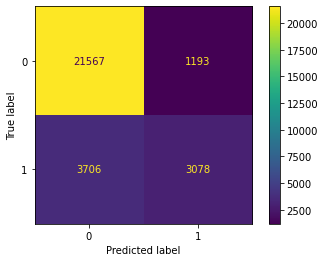

In [35]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model_newfeatures, X_newfeatures_std_test, y_newfeatures_test, values_format='.0f')

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, scoring = None, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True, scoring = scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

<module 'matplotlib.pyplot' from '/home/matheussantos/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

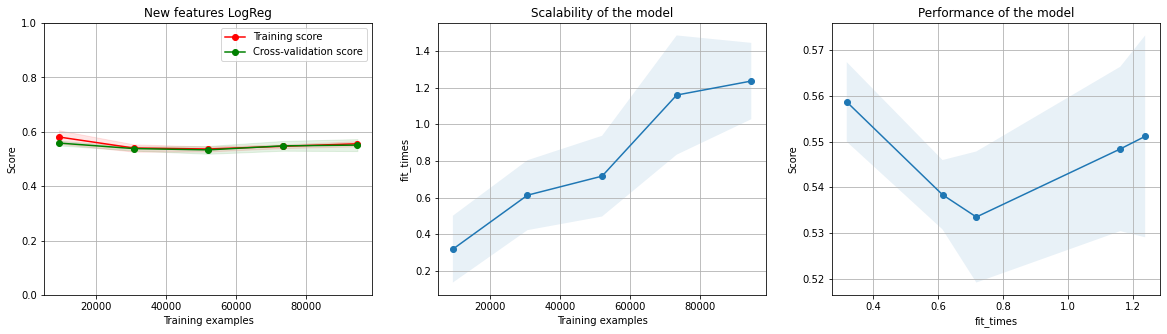

In [37]:
plot_learning_curve(model_newfeatures, 'New features LogReg', X_newfeatures_std, y_newfeatures, scoring = 'f1', ylim=(0,1))

In [39]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

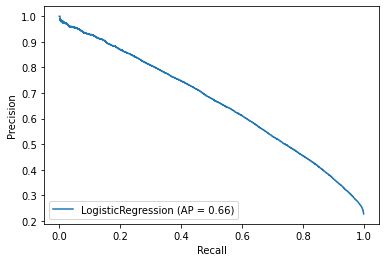

In [40]:
plot_precision_recall_curve(model_newfeatures, X_newfeatures_std, y_newfeatures)

In [41]:
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, rocauc, roc_auc, precision_recall_curve

/home/matheussantos/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


/home/matheussantos/.local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


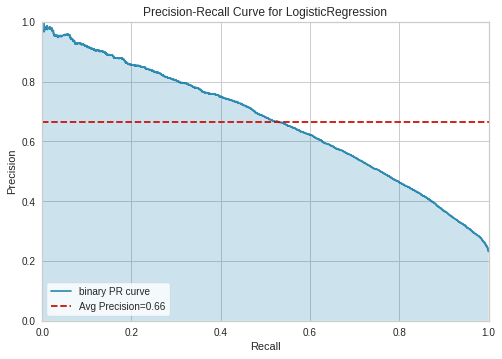

In [42]:
visualizer = PrecisionRecallCurve(model_newfeatures)
visualizer.fit(X_newfeatures_std, y_newfeatures)        # Fit the training data to the visualizer
visualizer.score(X_newfeatures_std_test, y_newfeatures_test)        # Evaluate the model on the test data
visualizer.show() 

/home/matheussantos/.local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


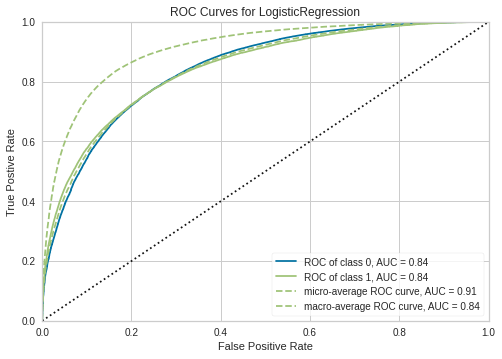

/home/matheussantos/.local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b56ee5890>,
       classes=None, encoder=None, force_model=False, is_fitted='auto',
       macro=True, micro=True, model=None, per_class=True)

In [43]:
roc_auc(model_newfeatures, X_newfeatures_std, y_newfeatures)

> **Utilizando árvore de decisão**

In [44]:
from sklearn.tree import DecisionTreeClassifier

df = pd.get_dummies(new_df_master.dropna().drop(columns = ['date', 'location']))

std = StandardScaler()
X_std = std.fit_transform(df.drop(columns = ['raintomorrow']))
y = df['raintomorrow']

X_train, X_test, y_train, y_test = train_test_split(X_std, y)

model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     22962
           1       0.70      0.43      0.53      6582

    accuracy                           0.83     29544
   macro avg       0.77      0.69      0.71     29544
weighted avg       0.82      0.83      0.82     29544



/home/matheussantos/.local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


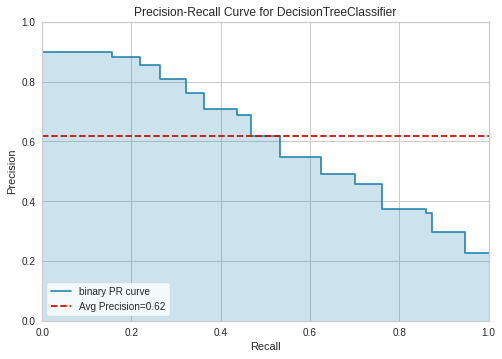

/home/matheussantos/.local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


PrecisionRecallCurve(ap_score=True,
                     ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b56e6ee50>,
                     classes=None, encoder=None, fill_area=True,
                     fill_opacity=0.2, force_model=False, is_fitted='auto',
                     iso_f1_curves=False, iso_f1_values={0.2, 0.4, 0.6, 0.8},
                     line_opacity=0.8, micro=True, model=None, per_class=False)

In [45]:
precision_recall_curve(model, X_train, y_train)

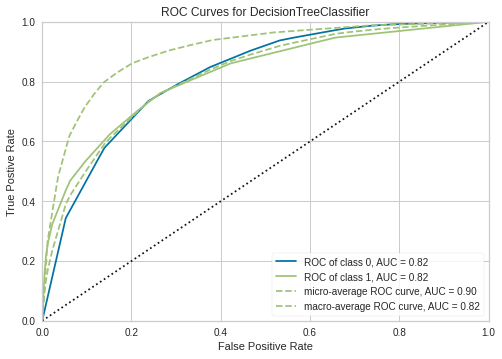

/home/matheussantos/.local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b52326290>,
       classes=None, encoder=None, force_model=False, is_fitted='auto',
       macro=True, micro=True, model=None, per_class=True)

In [46]:
roc_auc(model, X_train, y_train)

In [185]:
ddd =pd.read_csv('../../Downloads/rain_wind.csv', index_col= 0)

In [203]:
X = ddd.drop(columns = ['raintomorrow', 'precipitation9am', 'precipitation3pm'])
y = ddd.raintomorrow

In [157]:
X = df_master.drop(columns = ['raintoday', 'temp', 'precipitation9am', 'precipitation3pm', 'raintomorrow', 'amountOfRain', 'modelo_vigente']).select_dtypes(exclude = 'object')
y = df_master.raintomorrow

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y)

In [205]:
from lightgbm import plot_importance, LGBMClassifier

In [206]:
lgb = LGBMClassifier(max_depth=3, colsample_bytree=0.7)

In [207]:
lgb.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.7,
               importance_type='split', learning_rate=0.1, max_depth=3,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [208]:
print(classification_report(y_test, lgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     16325
           1       0.75      0.52      0.62      5251

    accuracy                           0.84     21576
   macro avg       0.81      0.73      0.76     21576
weighted avg       0.83      0.84      0.83     21576



In [192]:
print(classification_report(y_test, lgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     16325
           1       0.76      0.53      0.62      5251

    accuracy                           0.84     21576
   macro avg       0.81      0.74      0.76     21576
weighted avg       0.84      0.84      0.83     21576



<module 'matplotlib.pyplot' from '/home/matheussantos/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

<Figure size 1152x1152 with 0 Axes>

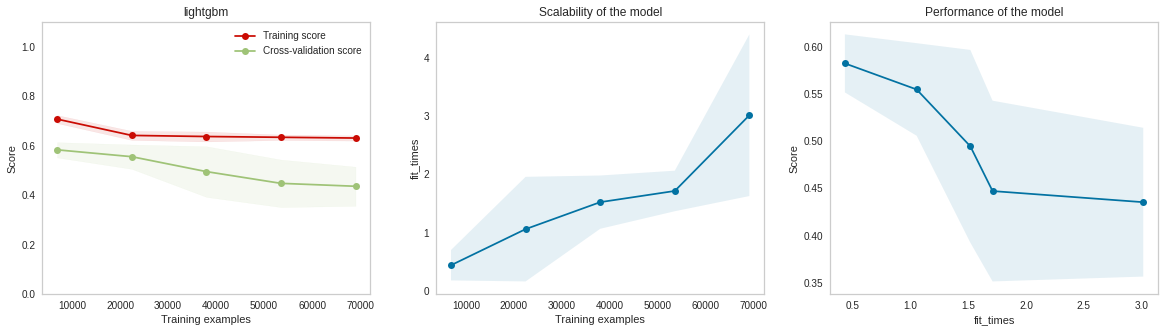

In [209]:
plt.figure(figsize = (16,16))
plot_learning_curve(lgb, 'lightgbm', X, y, ylim = (0,1.1), scoring  ='f1')

<module 'matplotlib.pyplot' from '/home/matheussantos/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

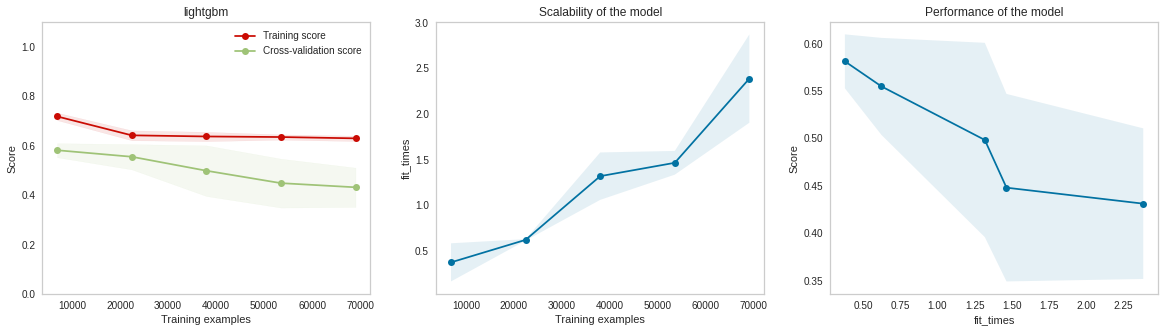

In [193]:
plt.figure(figsize = (16,16))
plot_learning_curve(lgb, 'lightgbm', X, y, ylim = (0,1.1), scoring  ='f1')

<Figure size 1152x1152 with 0 Axes>

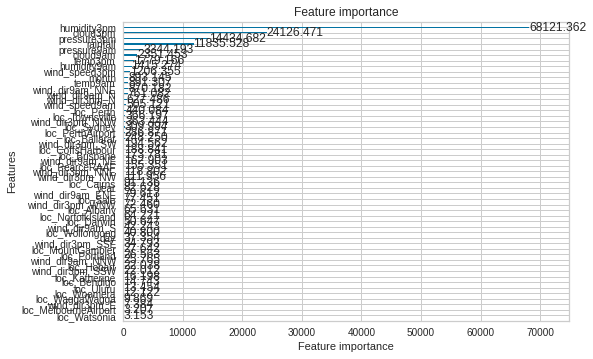

In [210]:
plt.figure(figsize = (16,16))
plot_importance(lgb, importance_type='gain')

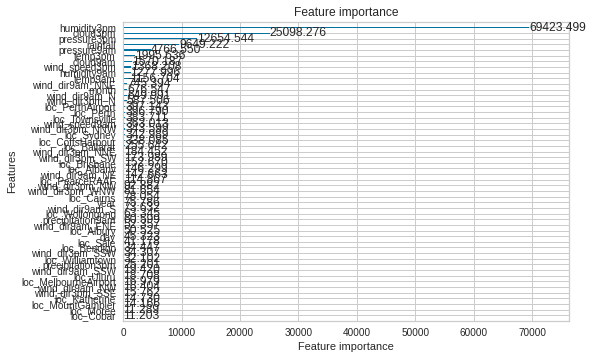

In [194]:
plt.figure(figsize = (16,16))
plot_importance(lgb, importance_type='gain')

In [178]:
X = df_master.drop(columns = ['raintoday', 'temp', 'precipitation9am', 'precipitation3pm', 'raintomorrow', 'amountOfRain', 'modelo_vigente']).select_dtypes(exclude = 'object')
y = df_master.raintomorrow

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y)

In [211]:
from xgboost import XGBClassifier, plot_importance

In [212]:
xgb = XGBClassifier(max_depth = 3, colsample_bytree = 0.7)

In [213]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [214]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     16325
           1       0.75      0.55      0.64      5251

    accuracy                           0.85     21576
   macro avg       0.81      0.75      0.77     21576
weighted avg       0.84      0.85      0.84     21576



In [200]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     16325
           1       0.76      0.55      0.64      5251

    accuracy                           0.85     21576
   macro avg       0.81      0.75      0.77     21576
weighted avg       0.84      0.85      0.84     21576



<module 'matplotlib.pyplot' from '/home/matheussantos/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

<Figure size 1152x1152 with 0 Axes>

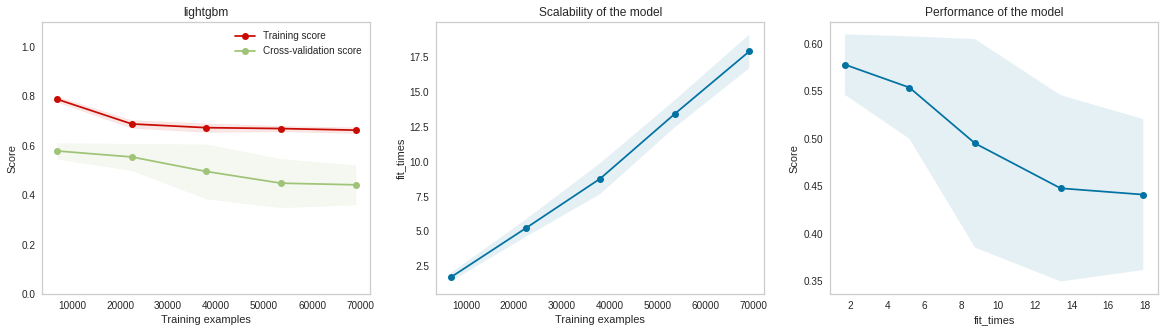

In [216]:
plt.figure(figsize = (16,16))
plot_learning_curve(xgb, 'lightgbm', X, y, ylim = (0,1.1), scoring  ='f1')

<module 'matplotlib.pyplot' from '/home/matheussantos/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

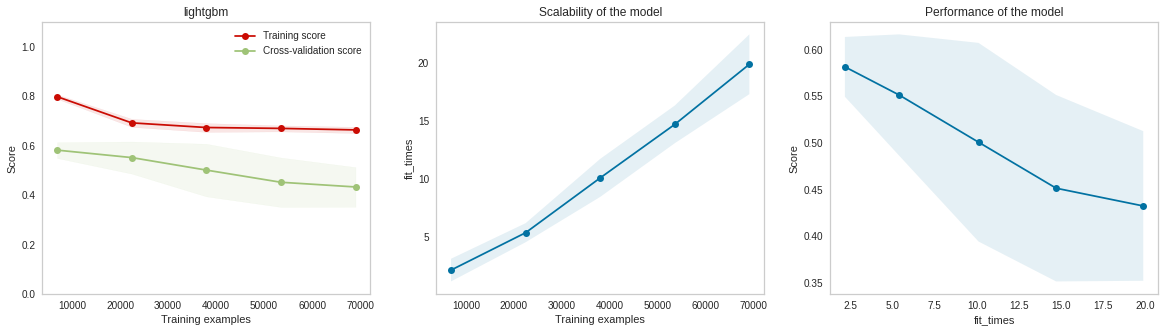

In [201]:
plt.figure(figsize = (16,16))
plot_learning_curve(xgb, 'lightgbm', X, y, ylim = (0,1.1), scoring  ='f1')

<Figure size 1152x1152 with 0 Axes>

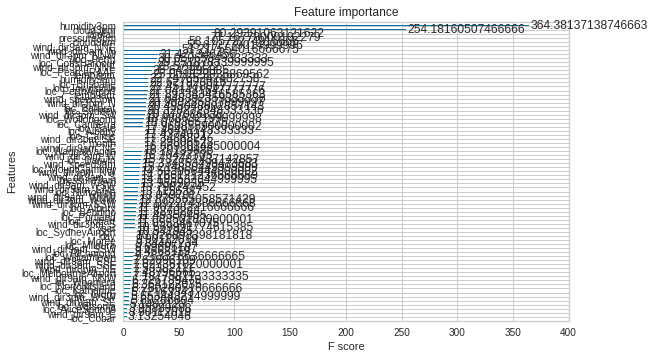

In [215]:
plt.figure(figsize = (16,16))
plot_importance(xgb, importance_type='gain')

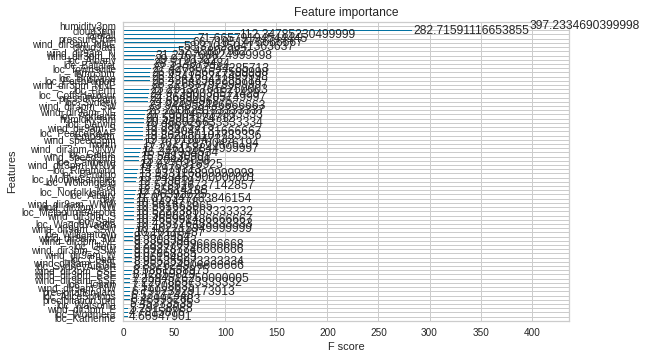

In [202]:
plt.figure(figsize = (16,16))
plot_importance(xgb, importance_type='gain')

(array([4.4980e+03, 7.7120e+03, 1.4635e+04, 1.6032e+04, 1.4179e+04,
        1.0880e+04, 7.3530e+03, 2.5130e+03, 5.4680e+03, 7.4000e+02,
        1.0650e+03, 5.2800e+02, 3.3400e+02, 1.5800e+02, 6.1000e+01,
        7.6000e+01, 4.3000e+01, 1.2000e+01, 1.3000e+01, 4.0000e+00]),
 array([ 0.  ,  3.45,  6.9 , 10.35, 13.8 , 17.25, 20.7 , 24.15, 27.6 ,
        31.05, 34.5 , 37.95, 41.4 , 44.85, 48.3 , 51.75, 55.2 , 58.65,
        62.1 , 65.55, 69.  ]),
 <a list of 20 Patch objects>)

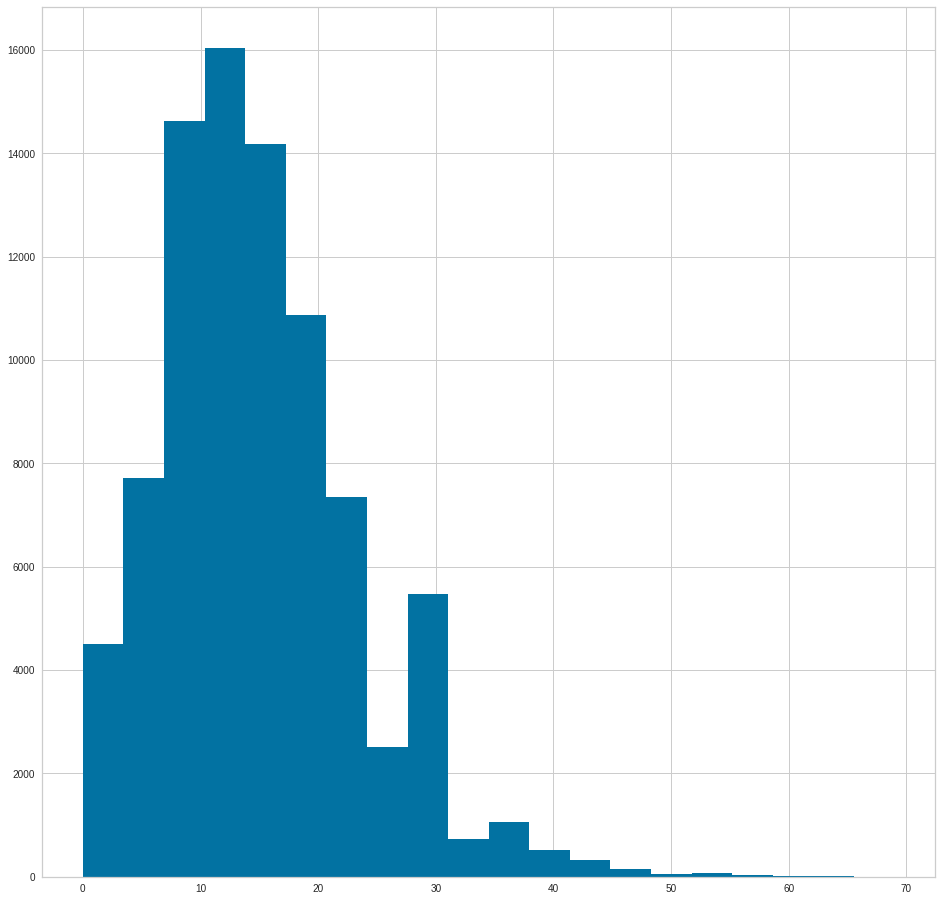

In [226]:
plt.figure(figsize = (16,16))
plt.hist(ddd['wind_speed9am'], bins = 20)

In [222]:
1 - 14/len(df_master)

0.9999015422700133

In [230]:
import seaborn as sns

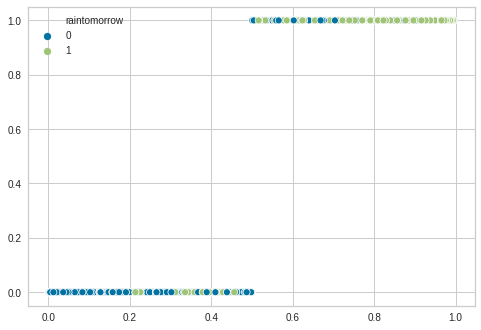

In [239]:
sns.scatterplot(xgb.predict_proba(X_test)[:, 1], xgb.predict(X_test), hue = y_test)

In [244]:
from sklearn.metrics import confusion_matrix, classification_report

In [255]:
confusion_matrix(y_test, xgb.predict_proba(X_test)[:, 1] > 0.05)

array([[6334, 9991],
       [ 109, 5142]])

In [254]:
print(classification_report(y_test, xgb.predict_proba(X_test)[:, 1] > 0.05))

              precision    recall  f1-score   support

           0       0.98      0.39      0.56     16325
           1       0.34      0.98      0.50      5251

    accuracy                           0.53     21576
   macro avg       0.66      0.68      0.53     21576
weighted avg       0.83      0.53      0.54     21576

